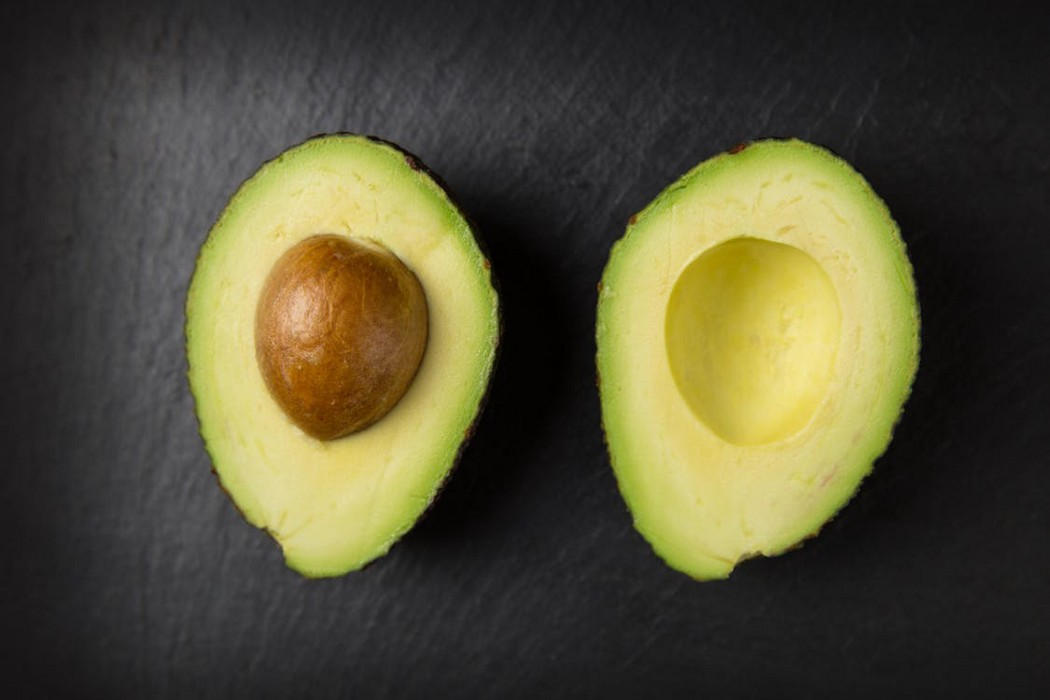

### The Problem Statement

Data represents weekly 2018 retail scan data for National retail volume (units) and price.
Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

|Column Name  | Description                                        |
|-------------|:--------------------------------------------------:|
|Unamed: 0    | Its just a index feature that will be removed later|
|Date         | The date of the observation                        |
|AveragePrice | the average price of a single avocado              |
|Total Volume | Total number of avocados sold                      |
|4046         | Total number of avocados with PLU 4046 sold        |
|4225         | Total number of avocados with PLU 4225 sold        |
|4770         | Total number of avocados with PLU 4770 sold        |
|Total Bags   | Total number of Bags sold                          |
|Small Bags   | Total number of Small Bags sold                    |
|Large Bags   | Total number of Large Bags sold                    |
|XLarge Bags  | Total number of XLarge Bags sold                   |
|type         | conventional or organic                            |
|year         | the year                                           |
|Region       | the city or region of the observation              |

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

In [2]:
avecado_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')
avecado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avecado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
avecado_df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2017-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,West
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [5]:
avecado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- We can see that no missing values exist in dataset

### Preprocessing

In [6]:
avecado_df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
avecado_df['Date']=pd.to_datetime(avecado_df['Date'])

In [8]:
# categorizing into several seasons
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [9]:
avecado_df['season'] = avecado_df.Date.map(season_of_date)
avecado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,autumn
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,autumn
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,autumn
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn


In [10]:
avecado_df.drop('Date',axis=1,inplace=True)
avecado_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,autumn
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,autumn
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,autumn
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn


In [11]:
Cat_features = ['type','region','season']

In [12]:
Num_features = ['Total Volume','4046','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

## Exploratory Data Analysis

### Univariate Analysis

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


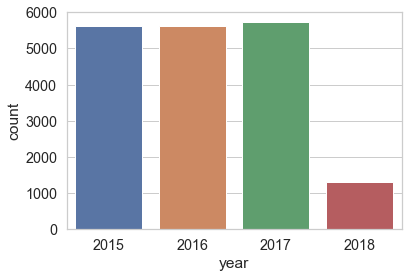

In [13]:
print(avecado_df['year'].value_counts())
sns.countplot(x='year', data=avecado_df)

conventional    9126
organic         9123
Name: type, dtype: int64


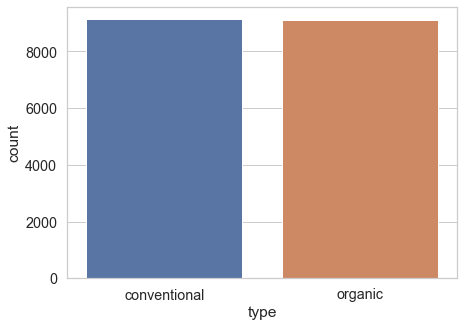

In [14]:
print(avecado_df['type'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(avecado_df['type'])
plt.show()

- Dataset contains equal count of Conventional and Organic Avecados

winter    5400
spring    4319
summer    4319
autumn    4211
Name: season, dtype: int64


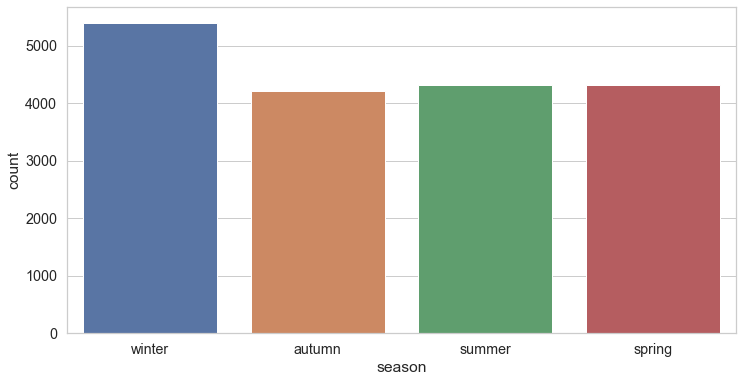

In [15]:
print(avecado_df.season.value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=avecado_df)
#plt.xticks(rotation=90)

West                   338
Boston                 338
MiamiFtLauderdale      338
Pittsburgh             338
Syracuse               338
Plains                 338
LosAngeles             338
Sacramento             338
Seattle                338
NewOrleansMobile       338
StLouis                338
SanFrancisco           338
Detroit                338
Boise                  338
NorthernNewEngland     338
Houston                338
CincinnatiDayton       338
Roanoke                338
TotalUS                338
Jacksonville           338
HarrisburgScranton     338
HartfordSpringfield    338
GreatLakes             338
SouthCentral           338
Tampa                  338
Charlotte              338
BuffaloRochester       338
Orlando                338
Atlanta                338
Columbus               338
Louisville             338
PhoenixTucson          338
Albany                 338
SanDiego               338
BaltimoreWashington    338
Denver                 338
Indianapolis           338
M

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

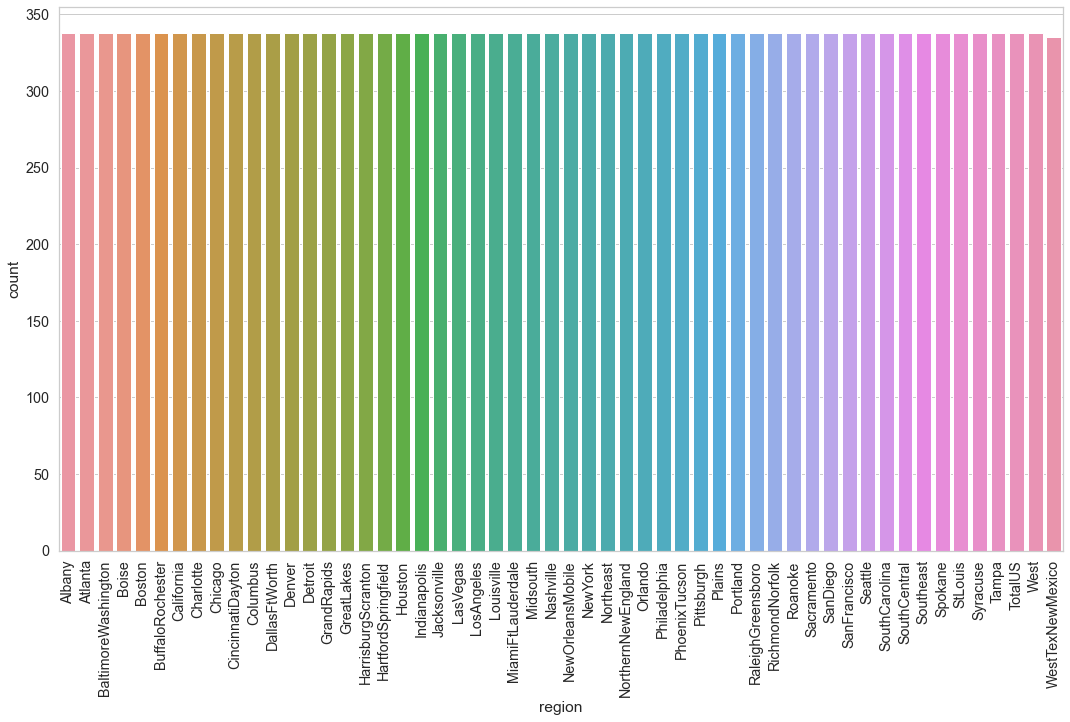

In [16]:
print(avecado_df['region'].value_counts())
plt.figure(figsize=(18,10))
sns.countplot(x='region', data=avecado_df)
plt.xticks(rotation=90)

- Data popints are equal across all Regions

In [17]:
avecado_df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'season'],
      dtype='object')

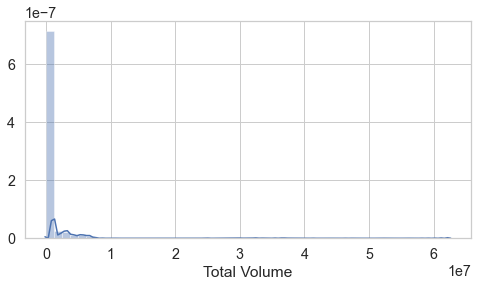

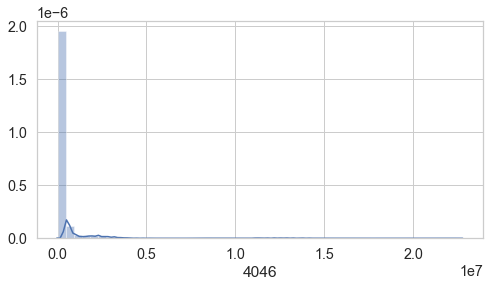

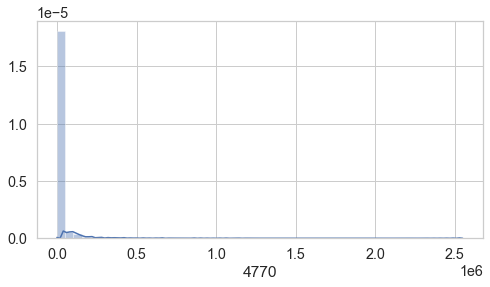

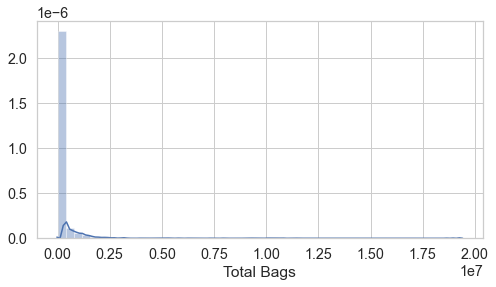

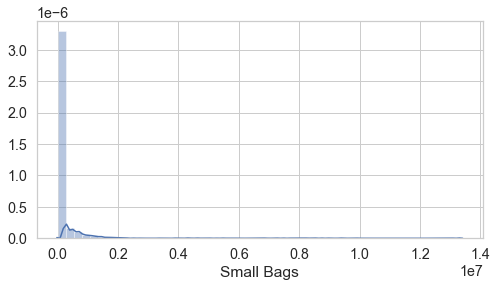

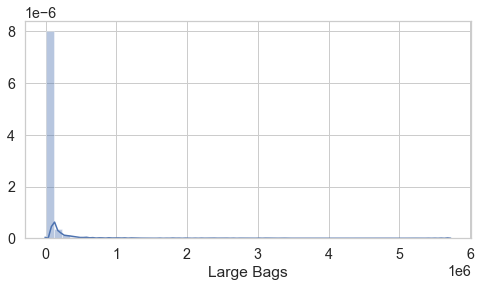

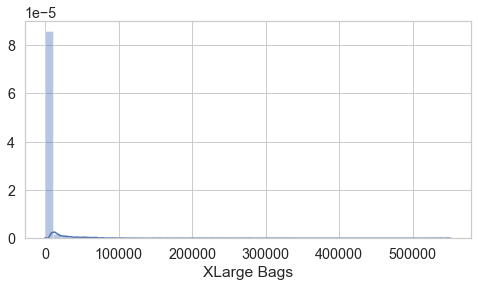

In [18]:
for f in Num_features:
    #print(avecado_df[f].value_counts())
    plt.figure(figsize=(8,4))
    sns.distplot(avecado_df[f])

### Bivariate Analysis

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

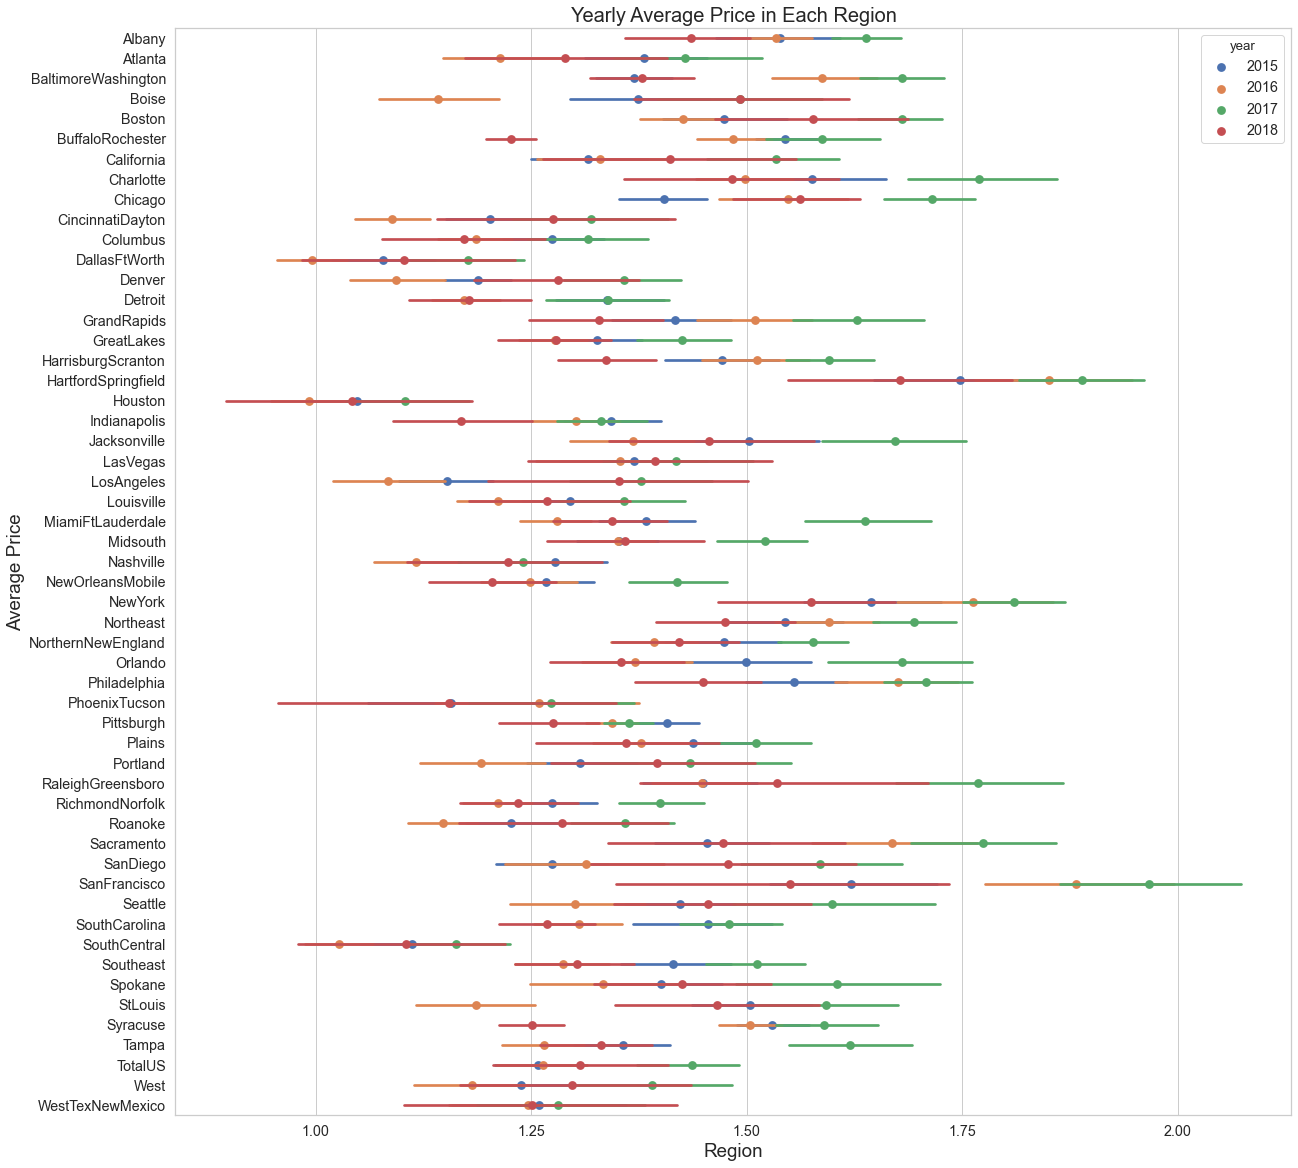

In [19]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=avecado_df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

- In this chart, we can see price changes according to type in cities

Text(0.5, 1.0, 'Type Average Price in Each Region')

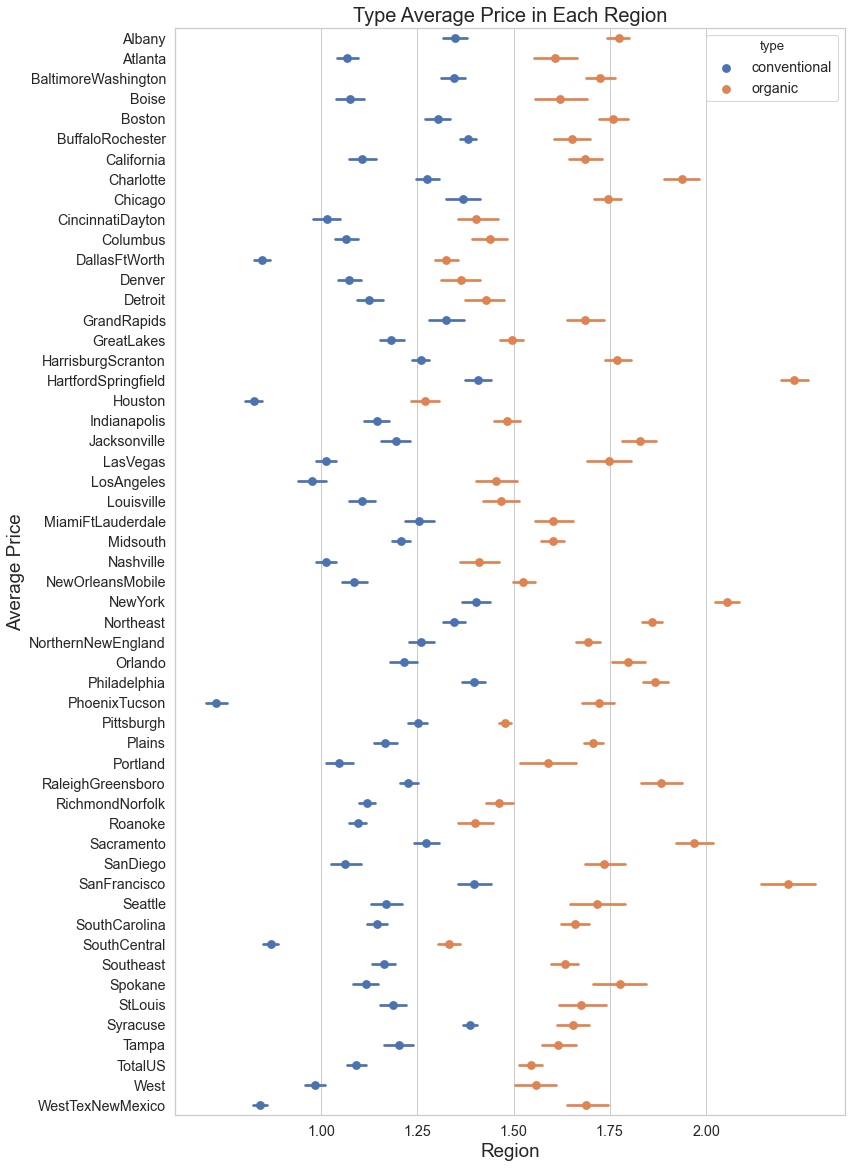

In [20]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=avecado_df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

- Across all regions Orgonic Avecados are costly

### Assumptions

####  Target Variable ie.'AveragePrice' should be Normally Distributed

Skewness: 0.580303
Kurtosis: 0.325196


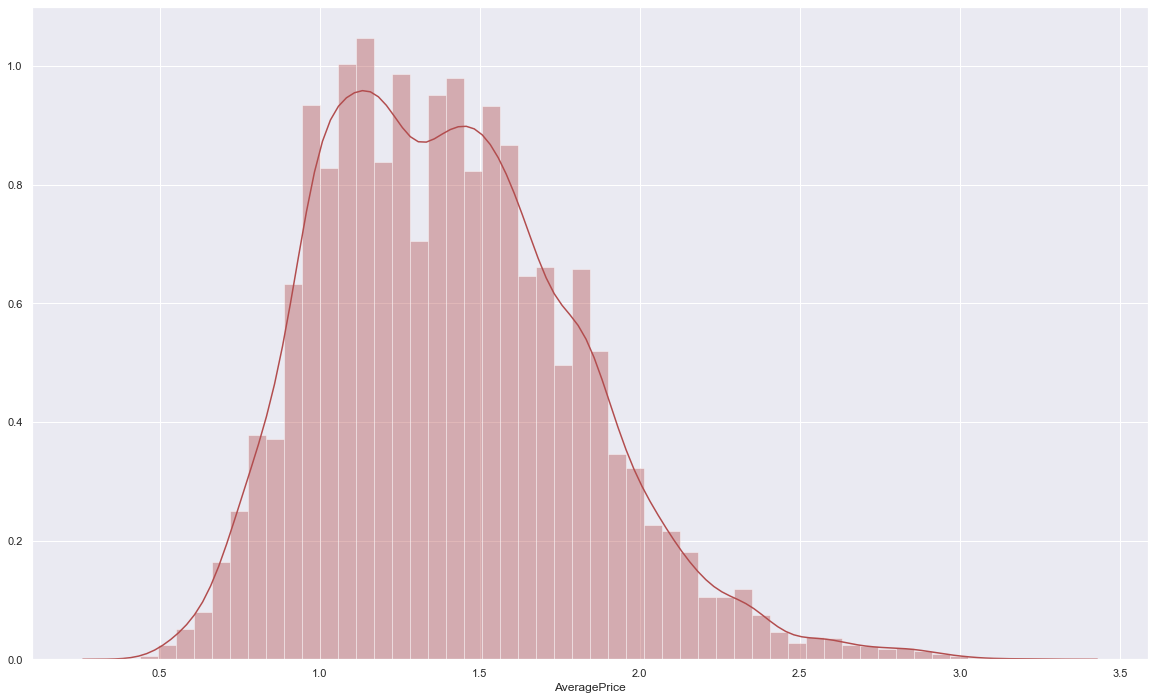

In [21]:
sns.set(color_codes=True)
plt.figure(figsize=(20,12))
sns.set_palette(sns.color_palette("Set1", n_colors=5, desat=.5))
sns.distplot(avecado_df["AveragePrice"])

#skewness and kurtosis
print("Skewness: %f" % avecado_df['AveragePrice'].skew())
print("Kurtosis: %f" % avecado_df['AveragePrice'].kurt())

-  Target Variable ie.'AveragePrice' is Normally Distributed

#### Linear Relationship between Target Variable and Explonatery Variables

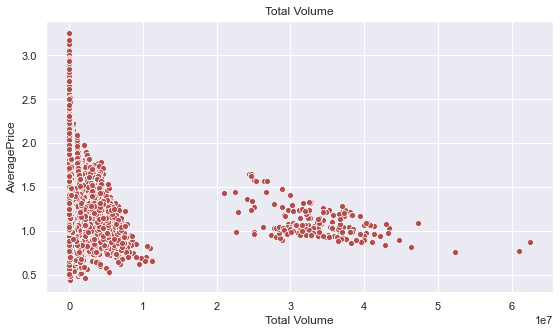

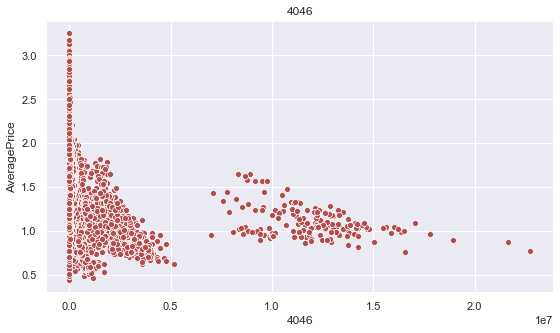

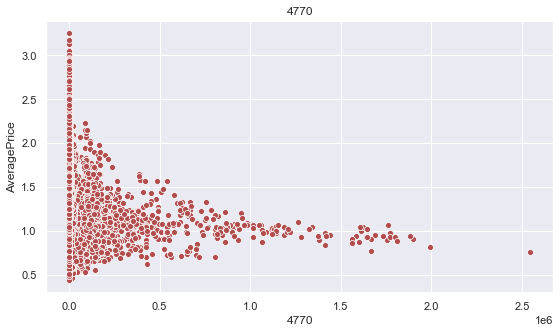

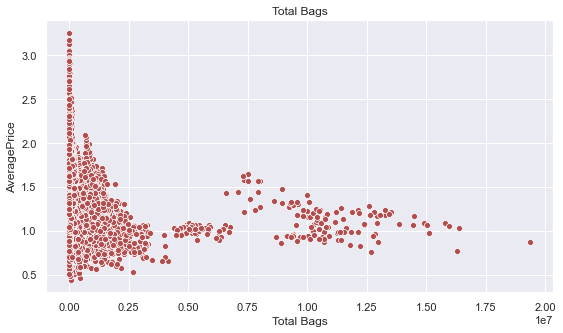

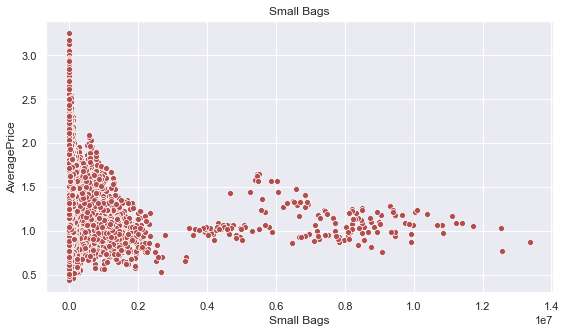

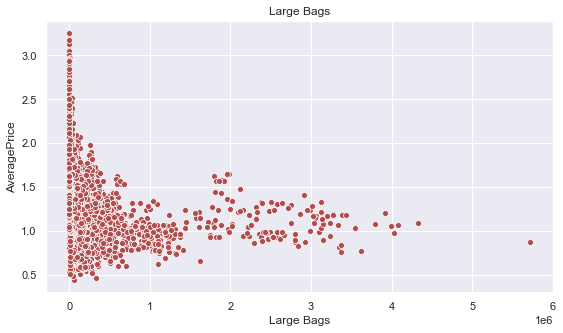

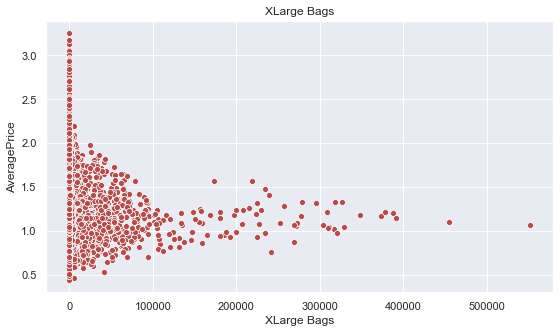

In [22]:
for column in Num_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.scatterplot(x=column, y="AveragePrice",  data = avecado_df)
    plt.title(column)

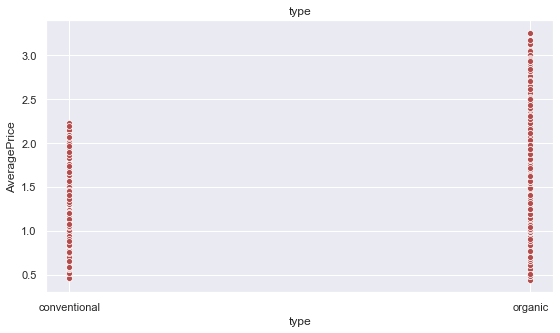

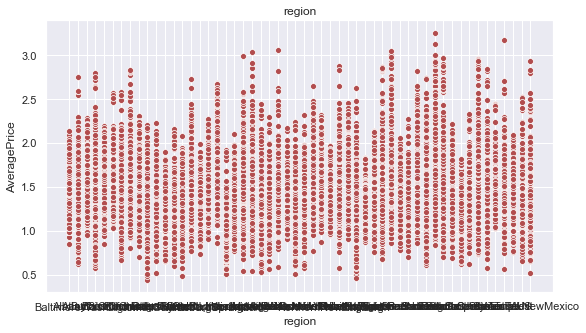

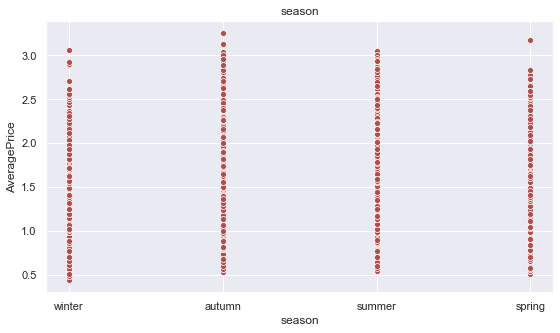

In [23]:
for column in Cat_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.scatterplot(x=column, y="AveragePrice",  data = avecado_df)
    plt.title(column)

#### Explonatery Variables must not be correlated with each other

In [24]:
avecado_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


Text(0.5, 1.0, 'Correlation between features')

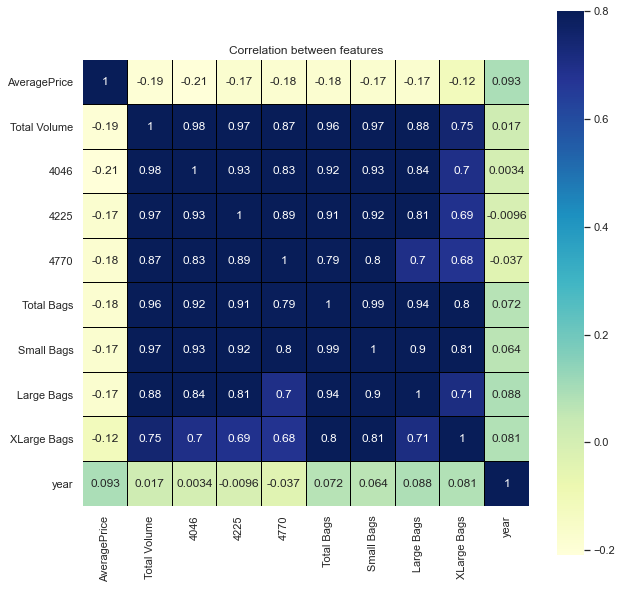

In [25]:
corr = avecado_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [26]:
avecado_df = pd.get_dummies(avecado_df,columns=['type','season','region'],drop_first=True) 
avecado_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic,season_spring,season_summer,season_winter,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,...,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting X and y into training and test datasets

In [27]:
X = avecado_df.loc[:,avecado_df.columns != 'AveragePrice'] 
y = avecado_df.AveragePrice

In [28]:
print(X.shape)
print(y.shape)

(18249, 66)
(18249,)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14599, 66)
(3650, 66)
(14599,)
(3650,)


### Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [32]:
X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)

In [33]:
X_test_s = pd.DataFrame(data=X_test_s)  # To convert to DataFrame
X_test_s.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,-0.236113,-0.228806,-0.222043,-0.212193,-0.238973,-0.242943,-0.211064,-0.173356,-0.155477,0.997059,-0.553004,1.784123,-0.647327,-0.135445,-0.135183,-0.137528,-0.13649,-0.13623,-0.137010,-0.137269,-0.137269,-0.137787,-0.137787,-0.139582,-0.138302,...,-0.133598,-0.136751,-0.138815,-0.139071,-0.138815,-0.139327,-0.139071,-0.140599,-0.135969,-0.139582,-0.137528,-0.133598,-0.136751,-0.13649,7.298724,-0.138815,-0.137528,-0.13701,-0.138044,-0.138302,-0.135183,-0.137528,-0.13701,-0.139071,-0.134393
1,-0.122264,-0.164184,-0.129167,-0.085494,-0.050336,0.009918,-0.221788,-0.165425,-1.215642,-1.002950,-0.553004,-0.560500,-0.647327,-0.135445,-0.135183,-0.137528,-0.13649,-0.13623,-0.137010,-0.137269,-0.137269,-0.137787,-0.137787,-0.139582,-0.138302,...,-0.133598,-0.136751,-0.138815,-0.139071,-0.138815,-0.139327,-0.139071,7.112424,-0.135969,-0.139582,-0.137528,-0.133598,-0.136751,-0.13649,-0.137010,-0.138815,-0.137528,-0.13701,-0.138044,-0.138302,-0.135183,-0.137528,-0.13701,-0.139071,-0.134393
2,-0.088966,0.042966,-0.186894,-0.211586,-0.116431,-0.151165,0.004059,-0.173356,0.904688,-1.002950,1.808304,-0.560500,-0.647327,-0.135445,-0.135183,-0.137528,-0.13649,-0.13623,-0.137010,-0.137269,-0.137269,-0.137787,-0.137787,-0.139582,-0.138302,...,-0.133598,-0.136751,7.203813,-0.139071,-0.138815,-0.139327,-0.139071,-0.140599,-0.135969,-0.139582,-0.137528,-0.133598,-0.136751,-0.13649,-0.137010,-0.138815,-0.137528,-0.13701,-0.138044,-0.138302,-0.135183,-0.137528,-0.13701,-0.139071,-0.134393
3,-0.191483,-0.204325,-0.192282,-0.212529,-0.150450,-0.131270,-0.194443,-0.173356,0.904688,0.997059,1.808304,-0.560500,-0.647327,-0.135445,-0.135183,-0.137528,-0.13649,-0.13623,7.298724,-0.137269,-0.137269,-0.137787,-0.137787,-0.139582,-0.138302,...,-0.133598,-0.136751,-0.138815,-0.139071,-0.138815,-0.139327,-0.139071,-0.140599,-0.135969,-0.139582,-0.137528,-0.133598,-0.136751,-0.13649,-0.137010,-0.138815,-0.137528,-0.13701,-0.138044,-0.138302,-0.135183,-0.137528,-0.13701,-0.139071,-0.134393
4,-0.244701,-0.230346,-0.242850,-0.212529,-0.241703,-0.243006,-0.221913,-0.173356,-1.215642,0.997059,1.808304,-0.560500,-0.647327,-0.135445,-0.135183,-0.137528,-0.13649,-0.13623,-0.137010,-0.137269,-0.137269,-0.137787,-0.137787,-0.139582,-0.138302,...,-0.133598,-0.136751,-0.138815,-0.139071,-0.138815,-0.139327,-0.139071,-0.140599,-0.135969,-0.139582,-0.137528,-0.133598,-0.136751,-0.13649,-0.137010,-0.138815,-0.137528,-0.13701,-0.138044,-0.138302,-0.135183,-0.137528,-0.13701,-0.139071,-0.134393


## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

model_LR.fit(X_train_s, y_train)

y_pred_train_LR = model_LR.predict(X_train_s)
y_pred_test_LR = model_LR.predict(X_test_s)  

In [38]:
df_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_LR})
df_LR

,Actual,Predicted
14192,2.11,1.809175
1873,0.98,1.091973
7293,1.17,1.267298
15087,1.78,1.651647
9888,1.61,1.646701
...,...,...
4471,1.11,1.122233
12556,1.26,1.202975
9063,1.05,1.172524
7497,1.31,1.342698


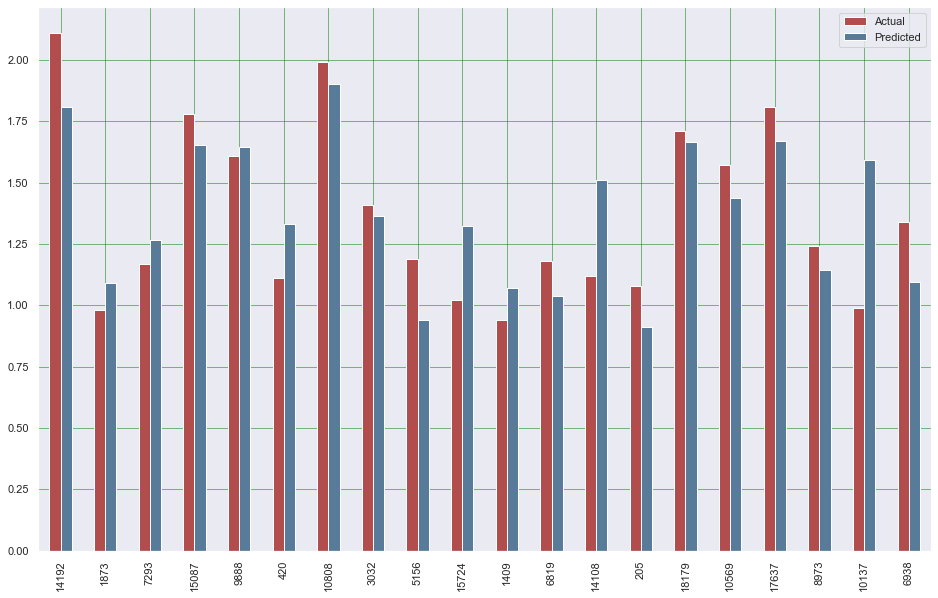

In [39]:
df1_LR = df_LR.head(20)
df1_LR.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Interpreting Model Coefficients

In [41]:
print('Intercept:',model_LR.intercept_)
print('Coefficients:',model_LR.coef_)  

Intercept: 1.405706555243069
Coefficients: [-1.36767822e+02  5.02802819e+01  4.75180778e+01  4.22249807e+00
 -2.84753639e+04  2.15547187e+04  7.04707168e+03  5.20587145e+02
  5.73713967e-02  2.45453592e-01 -5.31791549e-02  3.10857419e-03
 -9.60698480e-02 -2.86929131e-02 -1.69670090e-03 -2.78535881e-02
 -3.13504142e-03 -3.38034640e-03 -2.16897593e-02  7.65820798e-03
  1.00490504e-03 -4.59834047e-02 -4.15894655e-02 -6.38295314e-02
 -4.41823279e-02 -3.67814191e-02 -6.31550282e-03 -3.00116594e-02
 -4.16048282e-03  3.46496856e-02 -6.39626483e-02 -3.17333530e-02
 -6.20644670e-03 -2.38635897e-02 -4.67159113e-02 -3.68553650e-02
 -1.83327362e-02 -1.86432002e-02 -4.61549662e-02 -3.53780142e-02
  2.53588107e-02  1.00412201e-02 -9.65154596e-03 -7.54759613e-03
  1.05400082e-02 -4.61919207e-02 -2.57919988e-02 -1.59282766e-02
 -3.20951031e-02  4.26486396e-04 -3.56477935e-02 -4.28465532e-02
  8.29582080e-03 -2.10542055e-02  3.42155727e-02 -1.04132478e-02
 -1.99287809e-02 -6.08305904e-02 -2.08122307e-0

### Model Evaluation

#### RMSE

In [43]:
from sklearn import metrics

RMSE_test_LR = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LR))
RMSE_train_LR = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_LR))

print('LR_Test RMSE: ',RMSE_test_LR)
print('LR_Train RMSE: ',RMSE_train_LR)

LR_Test RMSE:  0.24948430431584648
LR_Train RMSE:  0.25260000716367453


#### R2

In [44]:
from sklearn.metrics import r2_score

r2_LR = r2_score(y_test,y_pred_test_LR)
r2_LR

0.6167906878909212

##  Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train_s, y_train)

DecisionTreeRegressor()

In [46]:
y_pred_train_DTR = DTR_model.predict(X_train_s)
y_pred_test_DTR = DTR_model.predict(X_test_s)  

In [47]:
df_DTR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_DTR})
df_DTR

,Actual,Predicted
14192,2.11,1.98
1873,0.98,1.03
7293,1.17,1.15
15087,1.78,1.60
9888,1.61,1.79
...,...,...
4471,1.11,0.91
12556,1.26,1.43
9063,1.05,1.34
7497,1.31,1.29


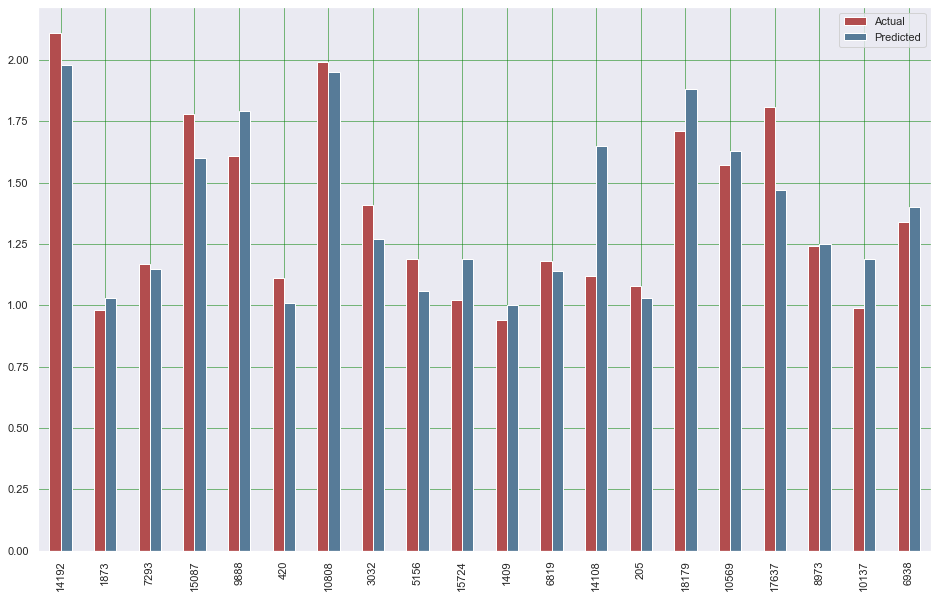

In [48]:
df1_DTR = df_DTR.head(20)
df1_DTR.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [49]:
RMSE_test_DTR = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_DTR))
RMSE_train_DTR = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_DTR))

print('Test RMSE: ',RMSE_test_DTR)
print('Train RMSE: ',RMSE_train_DTR)

Test RMSE:  0.1961194771435731
Train RMSE:  8.115139258603455e-18


In [50]:
r2_DTR = r2_score(y_test,y_pred_test_DTR)
r2_DTR

0.7631949002348999

##  Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor(random_state = 0)

RFR_model.fit(X_train_s, y_train)

RandomForestRegressor(random_state=0)

In [52]:
y_pred_train_RFR = RFR_model.predict(X_train_s)
y_pred_test_RFR = RFR_model.predict(X_test_s)  

In [53]:
df_RFR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_RFR})
df_RFR

,Actual,Predicted
14192,2.11,1.8218
1873,0.98,1.0313
7293,1.17,1.1893
15087,1.78,1.6593
9888,1.61,1.8187
...,...,...
4471,1.11,0.9733
12556,1.26,1.3623
9063,1.05,1.0433
7497,1.31,1.3067


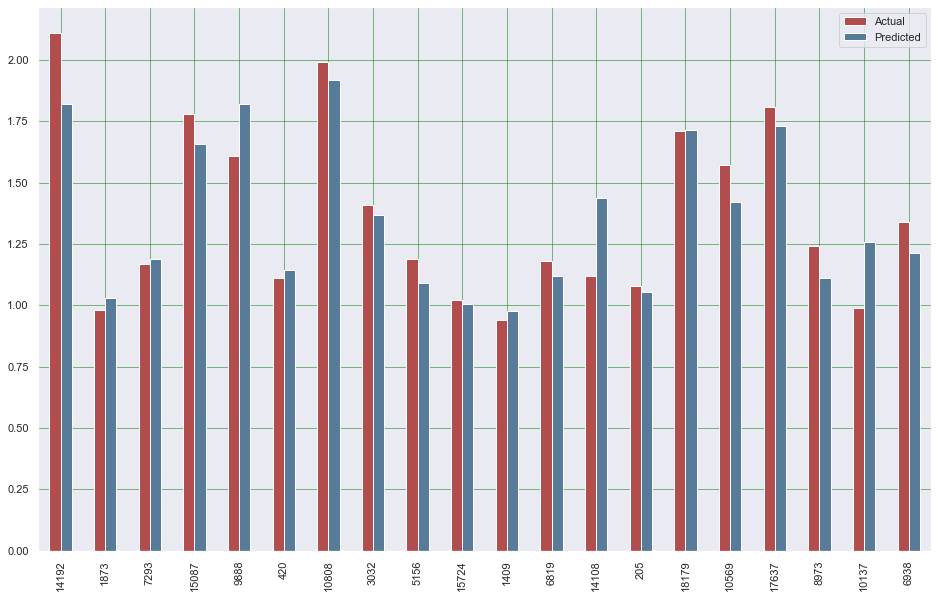

In [54]:
df1_RFR = df_RFR.head(20)
df1_RFR.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [56]:
RMSE_test_RFR = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_RFR))
RMSE_train_RFR = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_RFR))

print('RFR_Test RMSE: ',RMSE_test_RFR)
print('RFR_Train RMSE: ',RMSE_train_RFR)

RFR_Test RMSE:  0.13363438678538864
RFR_Train RMSE:  0.05099051910467558


In [63]:
r2_RFR = r2_score(y_test,y_pred_test_RFR)
r2_RFR

0.8900523255719698

In [57]:
from sklearn.model_selection import GridSearchCV

DTR_model_1 = DecisionTreeRegressor(random_state = 0)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['mse', 'mae']}

grid_search = GridSearchCV(DTR_model_1,param_grid=param_grid)

grid_search.fit(X_train_s, y_train)

print('Best Parameters are:',grid_search.best_params_)

Best Parameters are: {'criterion': 'mae', 'max_depth': 8, 'max_features': 'auto'}


In [59]:
y_pred_test_DTR_CV = grid_search.predict(X_test_s)

y_pred_train_DTR_CV = grid_search.predict(X_train_s)

In [60]:
RMSE_test_DTR_CV = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_DTR_CV))
RMSE_train_DTR_CV = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_DTR_CV))

print('RFR_Test RMSE: ',RMSE_test_DTR_CV)
print('RFR_Train RMSE: ',RMSE_train_DTR_CV)

RFR_Test RMSE:  0.22259093878097838
RFR_Train RMSE:  0.21504188712919065


In [65]:
r2_DTR_CV = r2_score(y_test,y_pred_test_DTR_CV)
r2_DTR_CV

0.6949545442189766